### LangGraph (mini-graph of states)

In [8]:
!pip install -q langgraph langchain langchain-openai python-dotenv

In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph, END
from dotenv import load_dotenv

load_dotenv()

True

### State

In [10]:
class State(TypedDict):
    x: int

### Nodes definitions

In [11]:
def add_one(state: State) -> State:
    return {"x": state["x"] + 1}

def multiply_by_two(state: State) -> State:
    return {"x": state["x"] * 2}

def finish(state: State) -> State:
    print(f"Result {state['x']}")
    return state

### Graph structure

In [12]:
graph = StateGraph(State)

# define nodes
graph.add_node("A", add_one)
graph.add_node("B", multiply_by_two)
graph.add_node("C", finish)

# define edges
graph.set_entry_point("A")
graph.add_edge("A", "B")
graph.add_edge("B", "C")
graph.add_edge("C", END)

### Compile and run the graph

In [13]:
app = graph.compile()

result = app.invoke({"x": 1})
print(result)

Result 4
{'x': 4}


### Display graph

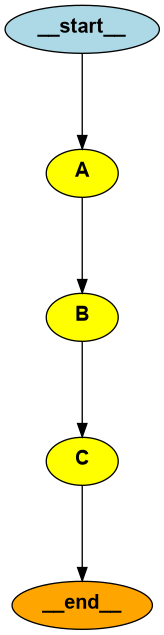

In [14]:
from IPython.display import Image, display

png_bytes = app.get_graph().draw_png()
display(Image(png_bytes))